# Process of Data Science Lab 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## Import the Titanic Dataset

In [2]:
df = pd.read_csv('titanic3.csv')

## Display the 5 first rows

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Display the column names

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Refactor Gender values and drop NaN values

In [5]:
df.loc[df.sex == 'female','sex'] = 0
df.loc[df.sex == 'male','sex'] = 1

df = df.dropna(subset=['sex', 'age'])

## Split the dataset into Test and Train data
### The inputs are gender and age, the target is whether or not the person survived

In [6]:
X = df.loc[:, ['sex','age']].values
y = df.loc[:, 'survived'].values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(1046, 2) (1046,)


## Plot the number of people who survived vs the number of people who died

[1 1 0 ... 0 0 0] [619, 427]


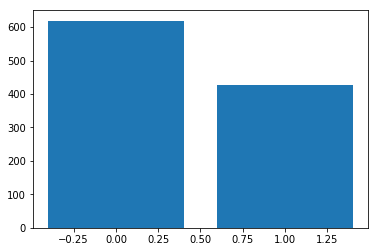

In [7]:
y_nam = []
y_h = []
for s in set(y):
    y_nam.append(s)
    y_h.append(X[y == s].shape[0])
print(y, y_h)
plt.bar(y_nam, height=y_h)
plt.show()

## Train a simple classifier model

In [8]:
clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=1.0,
    max_depth=1,
    random_state=0
).fit(X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)

## Display the test data accuracy score

In [10]:
clf.score(X_test, y_test)

0.7312138728323699

## Display the train data accuracy scores

In [11]:
accuracy_score(y_test, y_pred)

0.7312138728323699

## Display the f1 weighted accuracy score on the train data

In [12]:
f1_score(y_test, y_pred, average='weighted')

0.7290194065380088

## Display the Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[158  39]
 [ 54  95]]


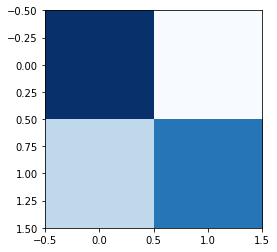

In [14]:
normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(normal_cm, cmap=plt.cm.Blues)

## Practice Questions
1- build a classifier to predict survived status using pclass,sex,age,embark<br>
2- do preprocessing and explain why you do so<br>
3- before training your model handle the nan and missing values as part of your preprocessing.<br>
4- train four different models (logistic regression, Decision Tree, Random Forest, and NN). apply grid search to find the best parameters for each classifier<br>
5- use cross-validation 5 to evaluate your classifier.<br>
6- create the confusion matrix and plot it<br>
7- plot box plot to show the difference between your classifiers<br>
8- do a t-test to check the difference between the models accuracy is statistically significant or not<br>
## Submit your answer

### 2) Preprocessing
I choose numeric values for the embarked column instead of C, S, Q (which denotes whether the passenger embarked from Cherbourg, Southampton, or Queenstown respectively). This is because StandardScaler and DBSCAN requires numeric values.

In [15]:
df.loc[df.embarked == 'C','embarked'] = 0
df.loc[df.embarked == 'S','embarked'] = 1
df.loc[df.embarked == 'Q','embarked'] = 2

### 3) Handle NaNs and missing values
I remove NaNs in the 4 columns pclass, sex, age, and embarked.

In [16]:
df = df.dropna(subset=['pclass', 'sex', 'age', 'embarked'])

### Re-create X and y after pre-processing has been done

In [17]:
X = df.loc[:, ['pclass', 'sex','age', 'embarked']].values
y = df.loc[:, 'survived'].values

### Continue pre-processing by using StandardScaler and DBSCAN algorithms
- StandardScaler standardizes all features by removing the mean and scaling to unit variance
- DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. The algorithm finds core samples of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.

In [18]:
labels_true = y

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

Estimated number of clusters: 13
Homogeneity: 0.303
Completeness: 0.091
V-measure: 0.140


/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 4) Train a Logistic Regression model

#### Perform GridSearch to find the best hyperparameters for Logistic Regression

In [19]:
# Split dataset into train/test data after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Perform grid search
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters for Logistic Regression:')
lr_grid_search.best_params_

Best hyperparameters for Logistic Regression:


{'C': 1}

#### Train the model with the optimized hyperparameters

In [20]:
lr_model = LogisticRegression(
    C=lr_grid_search.best_params_['C']
).fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

### Display Logistic Regression Scores

In [21]:
lr_model.score(X_test, y_test)

0.7884057971014493

In [22]:
accuracy_score(y_test, y_pred)

0.7884057971014493

In [23]:
f1_score(y_test, y_pred, average='weighted')

0.7866126419541127

### Print Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[179  31]
 [ 42  93]]


### Display Confusion Matrix

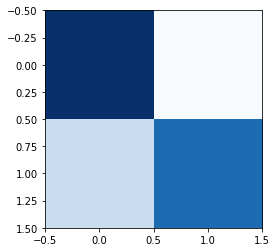

In [25]:
normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(normal_cm, cmap=plt.cm.Blues)

### 4) Train a Decision Tree model

In [26]:
# Split dataset into train/test data after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Perform grid search
dtc_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': [None, 100, 500, 1000],  # control the tree depth to prevent overfitting
        'min_samples_split': [1.0, 2, 3, 4, 5, 10, 20, 50, 100],  # control the number of samples at a leaf node
        'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50, 100],  # control the number of samples at a leaf node
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters for Logistic Regression:')
dtc_grid_search.best_params_

Best hyperparameters for Logistic Regression:


{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [27]:
dtc_model = DecisionTreeClassifier(
    max_depth=dtc_grid_search.best_params_['max_depth'],
    min_samples_split=dtc_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=dtc_grid_search.best_params_['min_samples_leaf'],
).fit(X_train, y_train)

y_pred = dtc_model.predict(X_test)

In [28]:
dtc_model.score(X_test, y_test)

0.8115942028985508

In [29]:
accuracy_score(y_test, y_pred)

0.8115942028985508

In [30]:
f1_score(y_test, y_pred, average='weighted')

0.8119516808913119

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[176  34]
 [ 31 104]]


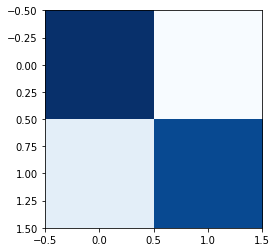

In [32]:
normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(normal_cm, cmap=plt.cm.Blues)

### 4) Train a Random Forest model

In [33]:
# Split dataset into train/test data after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Perform grid search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [5, 10, 15, 20],
        'min_samples_split': [1.0, 2, 4, 5, 10, 20, 50],
        'min_samples_leaf': [1, 2, 3, 5, 10, 20, 50],
        'min_weight_fraction_leaf': [0., 0.1]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters for Logistic Regression:')
rf_grid_search.best_params_

Best hyperparameters for Logistic Regression:


{'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5}

In [34]:
rf_model = RandomForestClassifier(
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    min_samples_split=rf_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    min_weight_fraction_leaf=rf_grid_search.best_params_['min_weight_fraction_leaf']
).fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [35]:
dtc_model.score(X_test, y_test)

0.8115942028985508

In [36]:
accuracy_score(y_test, y_pred)

0.7913043478260869

In [37]:
f1_score(y_test, y_pred, average='weighted')

0.7885605344405743

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[182  28]
 [ 44  91]]


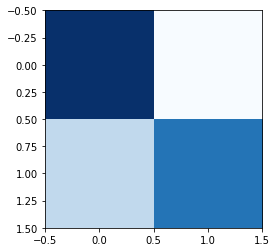

In [39]:
normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(normal_cm, cmap=plt.cm.Blues)

### 4) Train a Neural Network model

In [40]:
# Split dataset into train/test data after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Perform grid search
nn_grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000),
    param_grid={
        'hidden_layer_sizes': [(100, 50), (50,), (50, 10), (50, 10, 5), (16, 8)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters for Logistic Regression:')
nn_grid_search.best_params_

/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best hyperparameters for Logistic Regression:


{'alpha': 0.0001,
 'hidden_layer_sizes': (50, 10, 5),
 'learning_rate_init': 0.01}

In [41]:
nn_model = MLPClassifier(
    hidden_layer_sizes=nn_grid_search.best_params_['hidden_layer_sizes'],
    alpha=nn_grid_search.best_params_['alpha'],
    learning_rate_init=nn_grid_search.best_params_['learning_rate_init']
).fit(X_train, y_train)

y_pred = nn_model.predict(X_test)

In [42]:
dtc_model.score(X_test, y_test)

0.8115942028985508

In [64]:
accuracy_score(y_test, y_pred)

0.808695652173913

In [44]:
f1_score(y_test, y_pred, average='weighted')

0.803606719367589

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[191  19]
 [ 47  88]]


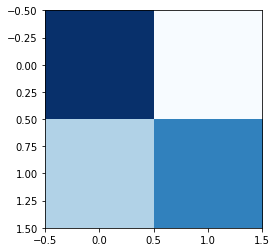

In [46]:
normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(normal_cm, cmap=plt.cm.Blues)

## Find the outliers in the dataset based on age and sex. Find their names as well.
## Submit your answer

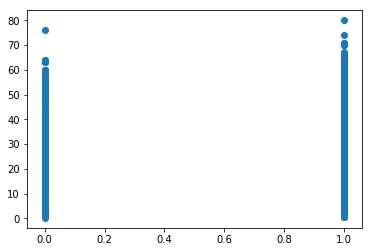

In [50]:
gender = df.loc[:, ['sex']].values
age = df.loc[:, ['age']].values
plt.scatter(x=gender, y=age)
plt.show()

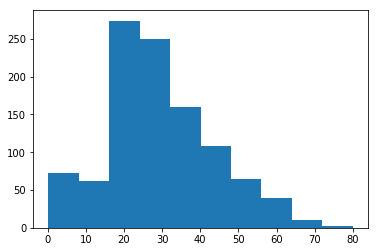

In [51]:
plt.hist(age)
plt.show()

In [59]:
outliers = df.query('age > 70')
outliers.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",1,71.0,0,0,PC 17609,49.5042,NaN,0,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0000,A23,1,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,76.0,1,0,19877,78.8500,C46,1,6,NaN,"Little Onn Hall, Staffs"
135,1,0,"Goldschmidt, Mr. George B",1,71.0,0,0,PC 17754,34.6542,A5,0,NaN,NaN,"New York, NY"
727,3,0,"Connors, Mr. Patrick",1,70.5,0,0,370369,7.7500,NaN,2,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",1,74.0,0,0,347060,7.7750,NaN,1,NaN,NaN,NaN


In [62]:
outlier_names = outliers['name'].values
print(outlier_names)

['Artagaveytia, Mr. Ramon' 'Barkworth, Mr. Algernon Henry Wilson'
 'Cavendish, Mrs. Tyrell William (Julia Florence Siegel)'
 'Goldschmidt, Mr. George B' 'Connors, Mr. Patrick' 'Svensson, Mr. Johan']
